# BASICS 03 - Training and evaluating accuracy

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/antoine/homhots/HOTS/HOTS


In [9]:
import pickle
from Network import network

# Defining the network and training

In [10]:
hots = network(algo='lagorce', krnlinit='first', tau=20)
hots.learninglagorce(diginit=True)

100%|██████████| 297828/297828 [03:53<00:00, 1274.13it/s]


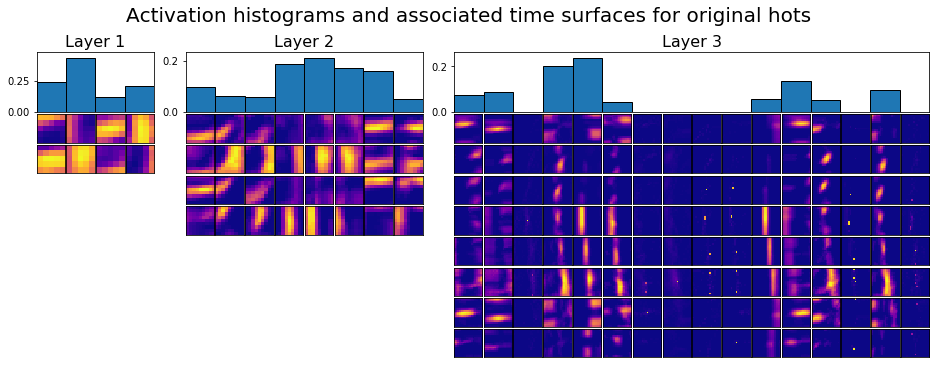

In [11]:
fig = hots.plotlayer()

# Running the Network on training samples

In [12]:
trainmap = hots.traininglagorce()

100%|██████████| 520844/520844 [05:34<00:00, 1556.62it/s]


# Runing the Network on testing samples

In [13]:
testmap, accuracy = hots.testinglagorce(trainmap)

100%|██████████| 558235/558235 [05:59<00:00, 1553.02it/s]

bhatta:92.5% - eucli:92.5% - norm:92.5%


In [14]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
with open(fname, 'wb') as file:
    pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)